In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/data.csv')

data.head(3)

,Fecha de Transacción,Referencia de Transacción,Código de Transacción,Descripción de Transacción,Débito de Transacción,Crédito de Transacción,Balance de Transacción
0,02/04/2022,966462383,TF,SINPE MOVIL Sin_Descripcion,55000.0,0.0,-55000.0
1,02/04/2022,406406523,TF,TEF DE: 950049205,0.0,55000.0,0.0
2,03/04/2022,966445279,TF,SINPE MOVIL Sin_Descripcion,20000.0,0.0,-20000.0


In [4]:
data['Descripción de Transacción'] = data['Descripción de Transacción'].str.strip()

data['Fecha de Transacción'] = pd.to_datetime(data['Fecha de Transacción'], format='%d/%m/%Y')

In [5]:
def clean_special_characters(text):
    cleaned_text = re.sub(r'[-*,.@]', '', text)
    cleaned_text = re.sub(r'_+$', '', cleaned_text)
    cleaned_text = re.sub(r'_', ' ', cleaned_text)
    return cleaned_text

data['Descripción de Transacción'] = data['Descripción de Transacción'].apply(clean_special_characters)
df.drop_duplicates(inplace=True)

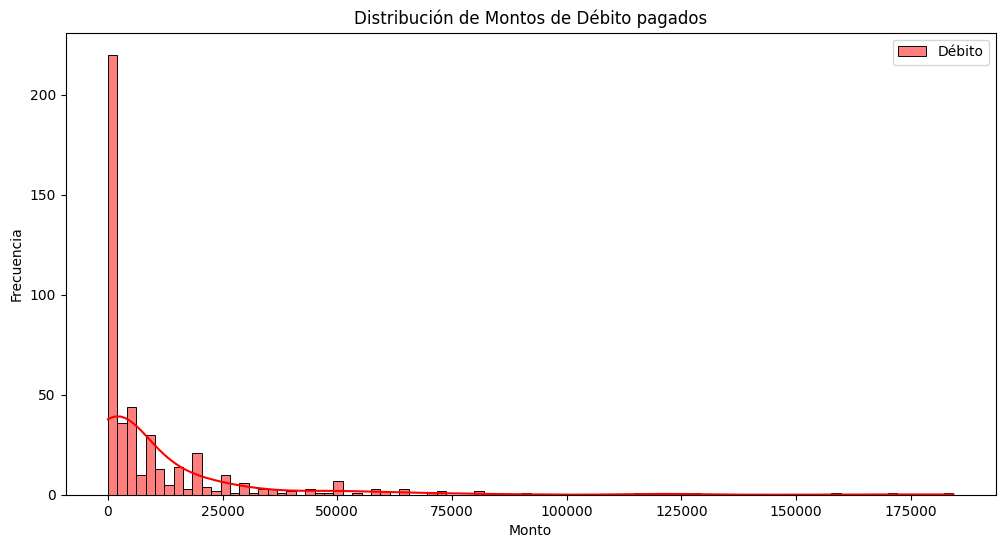

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Débito de Transacción'], kde=True, color='red', bins=90, label='Débito')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Montos de Débito pagados')
plt.legend()
plt.show()

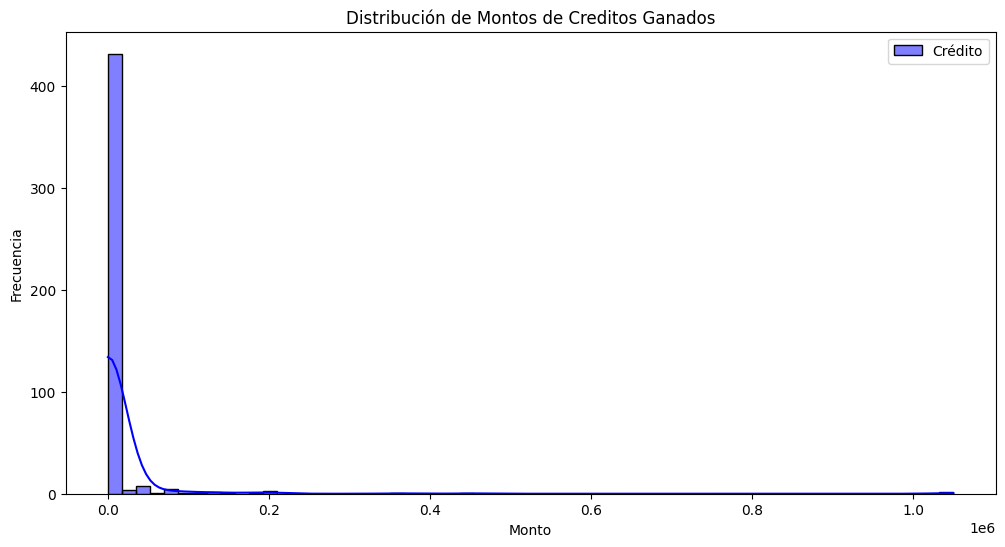

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Crédito de Transacción'], kde=True, color='blue', bins=60, label='Crédito')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Montos de Creditos Ganados')
plt.legend()
plt.show()

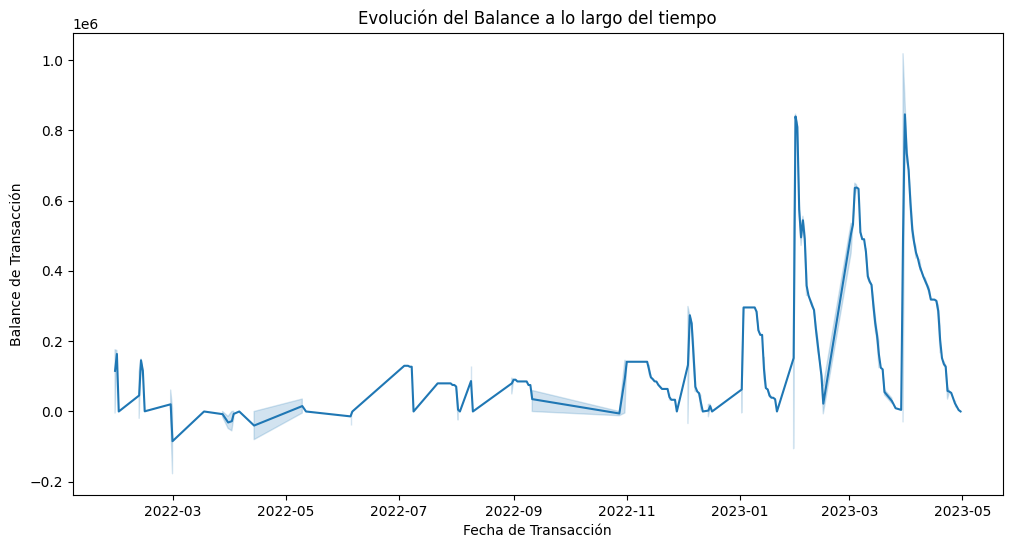

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Fecha de Transacción', y='Balance de Transacción')
plt.xlabel('Fecha de Transacción')
plt.ylabel('Balance de Transacción')
plt.title('Evolución del Balance a lo largo del tiempo')
plt.show()

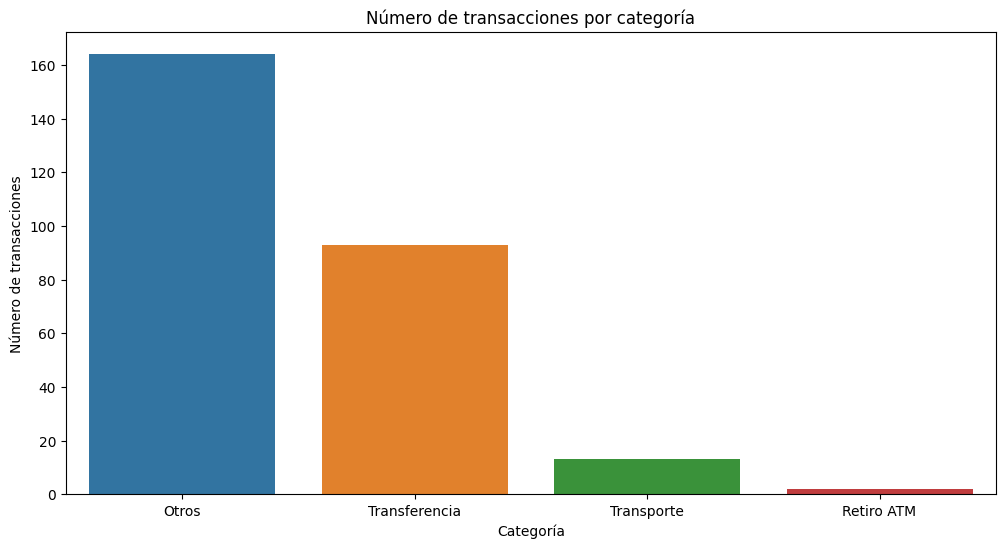

In [9]:
def categorize_description(description):
    categories = {
        'SUPER': 'Supermercado',
        'SINPE': 'Transferencia',
        'UBER': 'Transporte',
        'ATM': 'Retiro ATM',
        'INTERESES': 'Intereses',
    }
    for keyword, category in categories.items():
        if keyword in description:
            return category
    return 'Otros'

data['Categoría'] = data['Descripción de Transacción'].apply(categorize_description)

plt.figure(figsize=(12, 6))
gastos = data[data['Débito de Transacción'] > 0]
sns.barplot(x=gastos['Categoría'].value_counts().index, y=gastos['Categoría'].value_counts().values)
plt.xlabel('Categoría')
plt.ylabel('Número de transacciones')
plt.title('Número de transacciones por categoría')
plt.show()